In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import calendar
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Setup and data inspection

In [2]:
# display options:
pd.set_option('display.max_columns', None)

# import the data into a Pandas dataframe
data = pd.read_csv("hotel_bookings.csv")

data.head(20)

hotel  is_canceled  lead_time  arrival_date_year  \
0   Resort Hotel            0        342               2015   
1   Resort Hotel            0        737               2015   
2   Resort Hotel            0          7               2015   
3   Resort Hotel            0         13               2015   
4   Resort Hotel            0         14               2015   
5   Resort Hotel            0         14               2015   
6   Resort Hotel            0          0               2015   
7   Resort Hotel            0          9               2015   
8   Resort Hotel            1         85               2015   
9   Resort Hotel            1         75               2015   
10  Resort Hotel            1         23               2015   
11  Resort Hotel            0         35               2015   
12  Resort Hotel            0         68               2015   
13  Resort Hotel            0         18               2015   
14  Resort Hotel            0         37               2015   
15  Resort Hotel            0         68               2015   
16  Resort Hotel            0         37               2015   
17  Resort Hotel            0         12               2015   
18  Resort Hotel            0          0               2015   
19  Resort Hotel            0          7               2015   

   arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0                July                        27                          1   
1                July                        27                          1   
2                July                        27                          1   
3                July                        27                          1   
4                July                        27                          1   
5                July                        27                          1   
6                July                        27                          1   
7                July                        27                          1   
8                July                        27                          1   
9                July                        27                          1   
10               July                        27                          1   
11               July                        27                          1   
12               July                        27                          1   
13               July                        27                          1   
14               July                        27                          1   
15               July                        27                          1   
16               July                        27                          1   
17               July                        27                          1   
18               July                        27                          1   
19               July                        27                          1   

    stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                         0                     0       2       0.0       0   
1                         0                     0       2       0.0       0   
2                         0                     1       1       0.0       0   
3                         0                     1       1       0.0       0   
4                         0                     2       2       0.0       0   
5                         0                     2       2       0.0       0   
6                         0                     2       2       0.0       0   
7                         0                     2       2       0.0       0   
8                         0                     3       2       0.0       0   
9                         0                     3       2       0.0       0   
10                        0                     4       2       0.0       0   
11                        0                     4       2       0.0       0   
12                   

In [58]:
data.shape

(119390, 32)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [57]:
# All unique object values 
for col in data:
    if data[col].dtypes == 'object':
        print(f"{col}: \n{data[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

arrival_date_month: 
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

country: 
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA

In [7]:
data[data['children'].isna()]

hotel  is_canceled  lead_time  arrival_date_year  \
40600  City Hotel            1          2               2015   
40667  City Hotel            1          1               2015   
40679  City Hotel            1          1               2015   
41160  City Hotel            1          8               2015   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
40600             August                        32                          3   
40667             August                        32                          5   
40679             August                        32                          5   
41160             August                        33                         13   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
40600                        1                     0       2       NaN   
40667                        0                     2       2       NaN   
40679                        0                     2       3       NaN   
41160                        2                     5       2       NaN   

       babies meal country market_segment distribution_channel  \
40600       0   BB     PRT      Undefined            Undefined   
40667       0   BB     PRT         Direct            Undefined   
40679       0   BB     PRT      Undefined            Undefined   
41160       0   BB     PRT      Online TA            Undefined   

       is_repeated_guest  previous_cancellations  \
40600                  0                       0   
40667                  0                       0   
40679                  0                       0   
41160                  0                       0   

       previous_bookings_not_canceled reserved_room_type assigned_room_type  \
40600                               0                  B                  B   
40667                               0                  B                  B   
40679                               0                  B                  B   
41160                               0                  B                  B   

       booking_changes deposit_type  agent  company  days_in_waiting_list  \
40600                0   No Deposit    NaN      NaN                     0   
40667                0   No Deposit   14.0      NaN                     0   
40679                0   No Deposit    NaN      NaN                     0   
41160                0   No Deposit    9.0      NaN                     0   

         customer_type   adr  required_car_parking_spaces  \
40600  Transient-Party  12.0                            0   
40667  Transient-Party  12.0                            0   
40679  Transient-Party  18.0                            0   
41160  Transient-Party  76.5                            0   

       total_of_special_requests reservation_status reservation_status_date  
40600                          1           Canceled              2015-08-01  
40667                          1           Canceled              2015-08-04  
40679                          2           Canceled              2015-08-04  
41160                          1           Canceled              2015-08-09

In [8]:
data[data['meal']=='Undefined'].head(10)

hotel  is_canceled  lead_time  arrival_date_year  \
3106  Resort Hotel            0        105               2015   
3107  Resort Hotel            0        105               2015   
3108  Resort Hotel            0        105               2015   
3110  Resort Hotel            0         62               2015   
3111  Resort Hotel            0        105               2015   
3112  Resort Hotel            0        105               2015   
3113  Resort Hotel            0        105               2015   
3114  Resort Hotel            0         62               2015   
3115  Resort Hotel            0        105               2015   
3116  Resort Hotel            0        105               2015   

     arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
3106           November                        47                         18   
3107           November                        47                         18   
3108           November                        47                         18   
3110           November                        47                         18   
3111           November                        47                         18   
3112           November                        47                         18   
3113           November                        47                         18   
3114           November                        47                         18   
3115           November                        47                         18   
3116           November                        47                         18   

      stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
3106                        2                     4       2       0.0       0   
3107                        2                     4       2       0.0       0   
3108                        2                     4       2       0.0       0   
3110                        2                     4       2       0.0       0   
3111                        2                     4       2       0.0       0   
3112                        2                     4       2       0.0       0   
3113                        2                     4       2       0.0       0   
3114                        2                     4       1       0.0       0   
3115                        2                     4       2       0.0       0   
3116                        2                     4       2       0.0       0   

           meal country market_segment distribution_channel  \
3106  Undefined     ESP  Offline TA/TO                TA/TO   
3107  Undefined     ESP  Offline TA/TO                TA/TO   
3108  Undefined     ESP  Offline TA/TO                TA/TO   
3110  Undefined     ESP  Offline TA/TO                TA/TO   
3111  Undefined     ESP  Offline TA/TO                TA/TO   
3112  Undefined     ESP  Offline TA/TO                TA/TO   
3113  Undefined     ESP  Offline TA/TO                TA/TO   
3114  Undefined     ESP  Offline TA/TO                TA/TO   
3115  Undefined     ESP  Offline TA/TO                TA/TO   
3116  Undefined     ESP  Offline TA/TO                TA/TO   

      is_repeated_guest  previous_cancellations  \
3106                  0                       0   
3107                  0                       0   
3108                  0                       0   
3110                  0                       0   
3111                  0                       0   
3112                  0                       0   
3113                  0                       0   
3114                  0                       0   
3115                  0                       0   
3116                  0                       0   

      previous_bookings_not_canceled reserved_room_type assigned_room_type  \
3106                               0                  A                  A   
3107                               0                  A                  A   
3108                              

In [9]:
data[(data['market_segment']=='Undefined') | (data['distribution_channel']=='Undefined')]


hotel  is_canceled  lead_time  arrival_date_year  \
14594  Resort Hotel            0        103               2015   
40600    City Hotel            1          2               2015   
40667    City Hotel            1          1               2015   
40679    City Hotel            1          1               2015   
41160    City Hotel            1          8               2015   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
14594               July                        28                          5   
40600             August                        32                          3   
40667             August                        32                          5   
40679             August                        32                          5   
41160             August                        33                         13   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
14594                        2                     3       2       1.0   
40600                        1                     0       2       NaN   
40667                        0                     2       2       NaN   
40679                        0                     2       3       NaN   
41160                        2                     5       2       NaN   

       babies meal country market_segment distribution_channel  \
14594       0   HB     PRT         Direct            Undefined   
40600       0   BB     PRT      Undefined            Undefined   
40667       0   BB     PRT         Direct            Undefined   
40679       0   BB     PRT      Undefined            Undefined   
41160       0   BB     PRT      Online TA            Undefined   

       is_repeated_guest  previous_cancellations  \
14594                  0                       0   
40600                  0                       0   
40667                  0                       0   
40679                  0                       0   
41160                  0                       0   

       previous_bookings_not_canceled reserved_room_type assigned_room_type  \
14594                               0                  A                  A   
40600                               0                  B                  B   
40667                               0                  B                  B   
40679                               0                  B                  B   
41160                               0                  B                  B   

       booking_changes deposit_type  agent  company  days_in_waiting_list  \
14594                0   No Deposit    NaN      NaN                     0   
40600                0   No Deposit    NaN      NaN                     0   
40667                0   No Deposit   14.0      NaN                     0   
40679                0   No Deposit    NaN      NaN                     0   
41160                0   No Deposit    9.0      NaN                     0   

         customer_type    adr  required_car_parking_spaces  \
14594        Transient  112.7                            1   
40600  Transient-Party   12.0                            0   
40667  Transient-Party   12.0                            0   
40679  Transient-Party   18.0                            0   
41160  Transient-Party   76.5                            0   

       total_of_special_requests reservation_status reservation_status_date  
14594                          2          Check-Out              2015-07-10  
40600                          1           Canceled              2015-08-01  
40667                          1           Canceled              2015-08-04  
40679                          2           Canceled              2015-08-04  
41160                          1           Canceled              2015-08-09

In [10]:
# Number of entries with 0 adults, 0 children and 0 babies
data[(data['adults']==0) & (data['children']==0) & (data['babies']==0)].shape[0]

180

In [11]:
data.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

# Data cleaning and manipulation

### Drop observations:

In [12]:
# market_segment and distribution_channel columns contain few "Undefined" values, those rows can be dropped (also have Nan children)
data_cln = data[(data['market_segment']!='Undefined') & (data['distribution_channel']!='Undefined')]

# Some rows contain entries with 0 adults, 0 children and 0 babies. These can be also dropped because they are most likely errors.
data_cln = data_cln[(data_cln['adults']!=0) | (data_cln['children']!=0) | (data_cln['babies']!=0)]

### Replace missing values: 


In [13]:
# children: If not given, assumming zero
# country: If not given, placing "Unknown" value
# agent: If not given, assuming that the booking was done without one
# company: If not given, assuming that the booking was private

nan_replacements = {"children:": 0.0,"country": "Unknown", "agent": 0, "company": 0}
data_cln = data_cln.fillna(nan_replacements)

# meal column contains "Undefined" values, so assuming SC (self-catering) for those bookings
data_cln["meal"].replace("Undefined", "SC", inplace=True)

In [14]:
# How much data
data_cln.shape

(119205, 32)

In [15]:
data_cln.head(20)

hotel  is_canceled  lead_time  arrival_date_year  \
0   Resort Hotel            0        342               2015   
1   Resort Hotel            0        737               2015   
2   Resort Hotel            0          7               2015   
3   Resort Hotel            0         13               2015   
4   Resort Hotel            0         14               2015   
5   Resort Hotel            0         14               2015   
6   Resort Hotel            0          0               2015   
7   Resort Hotel            0          9               2015   
8   Resort Hotel            1         85               2015   
9   Resort Hotel            1         75               2015   
10  Resort Hotel            1         23               2015   
11  Resort Hotel            0         35               2015   
12  Resort Hotel            0         68               2015   
13  Resort Hotel            0         18               2015   
14  Resort Hotel            0         37               2015   
15  Resort Hotel            0         68               2015   
16  Resort Hotel            0         37               2015   
17  Resort Hotel            0         12               2015   
18  Resort Hotel            0          0               2015   
19  Resort Hotel            0          7               2015   

   arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0                July                        27                          1   
1                July                        27                          1   
2                July                        27                          1   
3                July                        27                          1   
4                July                        27                          1   
5                July                        27                          1   
6                July                        27                          1   
7                July                        27                          1   
8                July                        27                          1   
9                July                        27                          1   
10               July                        27                          1   
11               July                        27                          1   
12               July                        27                          1   
13               July                        27                          1   
14               July                        27                          1   
15               July                        27                          1   
16               July                        27                          1   
17               July                        27                          1   
18               July                        27                          1   
19               July                        27                          1   

    stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                         0                     0       2       0.0       0   
1                         0                     0       2       0.0       0   
2                         0                     1       1       0.0       0   
3                         0                     1       1       0.0       0   
4                         0                     2       2       0.0       0   
5                         0                     2       2       0.0       0   
6                         0                     2       2       0.0       0   
7                         0                     2       2       0.0       0   
8                         0                     3       2       0.0       0   
9                         0                     3       2       0.0       0   
10                        0                     4       2       0.0       0   
11                        0                     4       2       0.0       0   
12                   

# Preparing data for ML methods

In [16]:
cancel_corr = data_cln.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

lead_time                         0.292930
total_of_special_requests         0.234917
required_car_parking_spaces       0.195684
booking_changes                   0.144824
previous_cancellations            0.110147
is_repeated_guest                 0.083741
company                           0.083589
adults                            0.058157
previous_bookings_not_canceled    0.057364
days_in_waiting_list              0.054308
agent                             0.046748
adr                               0.046559
babies                            0.032567
stays_in_week_nights              0.025551
arrival_date_year                 0.016684
arrival_date_week_number          0.008299
arrival_date_day_of_month         0.005910
children                          0.004877
stays_in_weekend_nights           0.001309
Name: is_canceled, dtype: float64

In [17]:
cat_cols = [col for col in data_cln.columns if data_cln[col].dtype == 'O']
cat_df = data_cln[cat_cols]
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [18]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])
cat_df['res_status_month'] = cat_df['reservation_status_date'].dt.month
cat_df['res_status_day'] = cat_df['reservation_status_date'].dt.day

# some columns are excluded to make the model more general and to prevent leakage
# drop reservation_status_date, country, assigned_room_type and reservation_status columns
# country column is not good for general model
# assigned_room_type usually same as reserved_room_type
# reservation_status_year is also not good for general model

cat_df.drop(['reservation_status_date', 'country', 'assigned_room_type', 'reservation_status'] , axis = 1, inplace = True)
cat_df.head(10)

<ipython-input-18-14de72c3525c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])
<ipython-input-18-14de72c3525c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['res_status_month'] = cat_df['reservation_status_date'].dt.month
<ipython-input-18-14de72c3525c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

hotel arrival_date_month meal market_segment distribution_channel  \
0  Resort Hotel               July   BB         Direct               Direct   
1  Resort Hotel               July   BB         Direct               Direct   
2  Resort Hotel               July   BB         Direct               Direct   
3  Resort Hotel               July   BB      Corporate            Corporate   
4  Resort Hotel               July   BB      Online TA                TA/TO   
5  Resort Hotel               July   BB      Online TA                TA/TO   
6  Resort Hotel               July   BB         Direct               Direct   
7  Resort Hotel               July   FB         Direct               Direct   
8  Resort Hotel               July   BB      Online TA                TA/TO   
9  Resort Hotel               July   HB  Offline TA/TO                TA/TO   

  reserved_room_type deposit_type customer_type  res_status_month  \
0                  C   No Deposit     Transient                 7   
1                  C   No Deposit     Transient                 7   
2                  A   No Deposit     Transient                 7   
3                  A   No Deposit     Transient                 7   
4                  A   No Deposit     Transient                 7   
5                  A   No Deposit     Transient                 7   
6                  C   No Deposit     Transient                 7   
7                  C   No Deposit     Transient                 7   
8                  A   No Deposit     Transient                 5   
9                  D   No Deposit     Transient                 4   

   res_status_day  
0               1  
1               1  
2               2  
3               2  
4               3  
5               3  
6               3  
7               3  
8               6  
9              22

In [19]:
# convert arrival_date_month values into INT
lower_ma = [m.lower() for m in calendar.month_name]
cat_df['arrival_date_month'] = cat_df['arrival_date_month'].str.lower().map(lambda m: lower_ma.index(m)).astype('Int64')
cat_df.head(10)

<ipython-input-19-0c15a74d9dfb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['arrival_date_month'] = cat_df['arrival_date_month'].str.lower().map(lambda m: lower_ma.index(m)).astype('Int64')


hotel  arrival_date_month meal market_segment distribution_channel  \
0  Resort Hotel                   7   BB         Direct               Direct   
1  Resort Hotel                   7   BB         Direct               Direct   
2  Resort Hotel                   7   BB         Direct               Direct   
3  Resort Hotel                   7   BB      Corporate            Corporate   
4  Resort Hotel                   7   BB      Online TA                TA/TO   
5  Resort Hotel                   7   BB      Online TA                TA/TO   
6  Resort Hotel                   7   BB         Direct               Direct   
7  Resort Hotel                   7   FB         Direct               Direct   
8  Resort Hotel                   7   BB      Online TA                TA/TO   
9  Resort Hotel                   7   HB  Offline TA/TO                TA/TO   

  reserved_room_type deposit_type customer_type  res_status_month  \
0                  C   No Deposit     Transient                 7   
1                  C   No Deposit     Transient                 7   
2                  A   No Deposit     Transient                 7   
3                  A   No Deposit     Transient                 7   
4                  A   No Deposit     Transient                 7   
5                  A   No Deposit     Transient                 7   
6                  C   No Deposit     Transient                 7   
7                  C   No Deposit     Transient                 7   
8                  A   No Deposit     Transient                 5   
9                  D   No Deposit     Transient                 4   

   res_status_day  
0               1  
1               1  
2               2  
3               2  
4               3  
5               3  
6               3  
7               3  
8               6  
9              22

In [20]:
cat_df.columns

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'res_status_month', 'res_status_day'],
      dtype='object')

In [21]:
# encoding other categorical variables
# if the category is not ordinal then it is converteded into dummy variables

cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_df['meal'] = cat_df['meal'].map({'FB': 0, 'HB': 1, 'BB': 2, 'SC': 3})

cat_df = pd.get_dummies(cat_df, columns=['market_segment','distribution_channel','reserved_room_type','deposit_type','customer_type'],
                                prefix=['mar_seg','dist_ch','res_room','dep_type','cust_type'])

cat_df.head(30)


<ipython-input-21-e0206b38e3a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
<ipython-input-21-e0206b38e3a1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['meal'] = cat_df['meal'].map({'FB': 0, 'HB': 1, 'BB': 2, 'SC': 3})


hotel  arrival_date_month  meal  res_status_month  res_status_day  \
0       0                   7     2                 7               1   
1       0                   7     2                 7               1   
2       0                   7     2                 7               2   
3       0                   7     2                 7               2   
4       0                   7     2                 7               3   
5       0                   7     2                 7               3   
6       0                   7     2                 7               3   
7       0                   7     0                 7               3   
8       0                   7     2                 5               6   
9       0                   7     1                 4              22   
10      0                   7     2                 6              23   
11      0                   7     1                 7               5   
12      0                   7     2                 7               5   
13      0                   7     1                 7               5   
14      0                   7     2                 7               5   
15      0                   7     2                 7               5   
16      0                   7     2                 7               5   
17      0                   7     2                 7               2   
18      0                   7     2                 7               2   
19      0                   7     2                 7               5   
20      0                   7     2                 7               6   
21      0                   7     2                 7               7   
22      0                   7     2                 7               7   
23      0                   7     2                 7               7   
24      0                   7     1                 7               1   
25      0                   7     2                 7               8   
26      0                   7     2                 7               8   
27      0                   7     2                 5              11   
28      0                   7     2                 7               8   
29      0                   7     2                 7               8   

    mar_seg_Aviation  mar_seg_Complementary  mar_seg_Corporate  \
0                  0                      0                  0   
1                  0                      0                  0   
2                  0                      0                  0   
3                  0                      0                  1   
4                  0                      0                  0   
5                  0                      0                  0   
6                  0                      0                  0   
7                  0                      0                  0   
8                  0                      0                  0   
9                  0                      0                  0   
10                 0                      0                  0   
11                 0                      0                  0   
12                 0                      0                  0   
13                 0                      0                  0   
14                 0                      0                  0   
15                 0                      0                  0   
16                 0                      0                  0   
17                 0                      0                  0   
18                 0                      0                  1   
19                 0                      0                  0   
20                 0                      0                  0   
21                 0                      0                  0   
22                 0                      0                  0   
23                 0                      0                  0   
24                 0                      0                  0   
25                 0    

In [22]:
cat_df.shape

(119205, 32)

In [23]:
cat_df_cancel = cat_df
cat_df_cancel.insert(0, 'is_canceled',data_cln['is_canceled'])
cat_df_cancel.head()

is_canceled  hotel  arrival_date_month  meal  res_status_month  \
0            0      0                   7     2                 7   
1            0      0                   7     2                 7   
2            0      0                   7     2                 7   
3            0      0                   7     2                 7   
4            0      0                   7     2                 7   

   res_status_day  mar_seg_Aviation  mar_seg_Complementary  mar_seg_Corporate  \
0               1                 0                      0                  0   
1               1                 0                      0                  0   
2               2                 0                      0                  0   
3               2                 0                      0                  1   
4               3                 0                      0                  0   

   mar_seg_Direct  mar_seg_Groups  mar_seg_Offline TA/TO  mar_seg_Online TA  \
0               1               0                      0                  0   
1               1               0                      0                  0   
2               1               0                      0                  0   
3               0               0                      0                  0   
4               0               0                      0                  1   

   dist_ch_Corporate  dist_ch_Direct  dist_ch_GDS  dist_ch_TA/TO  res_room_A  \
0                  0               1            0              0           0   
1                  0               1            0              0           0   
2                  0               1            0              0           1   
3                  1               0            0              0           1   
4                  0               0            0              1           1   

   res_room_B  res_room_C  res_room_D  res_room_E  res_room_F  res_room_G  \
0           0           1           0           0           0           0   
1           0           1           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   res_room_H  res_room_L  dep_type_No Deposit  dep_type_Non Refund  \
0           0           0                    1                    0   
1           0           0                    1                    0   
2           0           0                    1                    0   
3           0           0                    1                    0   
4           0           0                    1                    0   

   dep_type_Refundable  cust_type_Contract  cust_type_Group  \
0                    0                   0                0   
1                    0                   0                0   
2                    0                   0                0   
3                    0                   0                0   
4                    0                   0                0   

   cust_type_Transient  cust_type_Transient-Party  
0                    1                          0  
1                    1                          0  
2                    1                          0  
3                    1                          0  
4                    1                          0

In [24]:
# correlations
cancel_corr_cat = cat_df.corr()["is_canceled"]
cancel_corr_cat.abs().sort_values(ascending=False)[1:]

dep_type_Non Refund          0.481537
dep_type_No Deposit          0.477988
mar_seg_Groups               0.222014
dist_ch_TA/TO                0.176107
mar_seg_Direct               0.154384
dist_ch_Direct               0.151574
hotel                        0.137049
cust_type_Transient          0.133325
cust_type_Transient-Party    0.124370
mar_seg_Corporate            0.081639
dist_ch_Corporate            0.075583
res_room_A                   0.069197
res_status_month             0.068573
res_room_D                   0.047722
mar_seg_Complementary        0.040329
res_room_E                   0.038874
cust_type_Group              0.038841
res_status_day               0.033997
mar_seg_Offline TA/TO        0.028654
cust_type_Contract           0.023683
res_room_F                   0.021773
dist_ch_GDS                  0.014927
mar_seg_Aviation             0.013754
dep_type_Refundable          0.011344
arrival_date_month           0.011160
res_room_B                   0.008839
res_room_C  

Text(0.5, 1.0, 'Correlation Matrix Spearman Method- Categorical Data ')

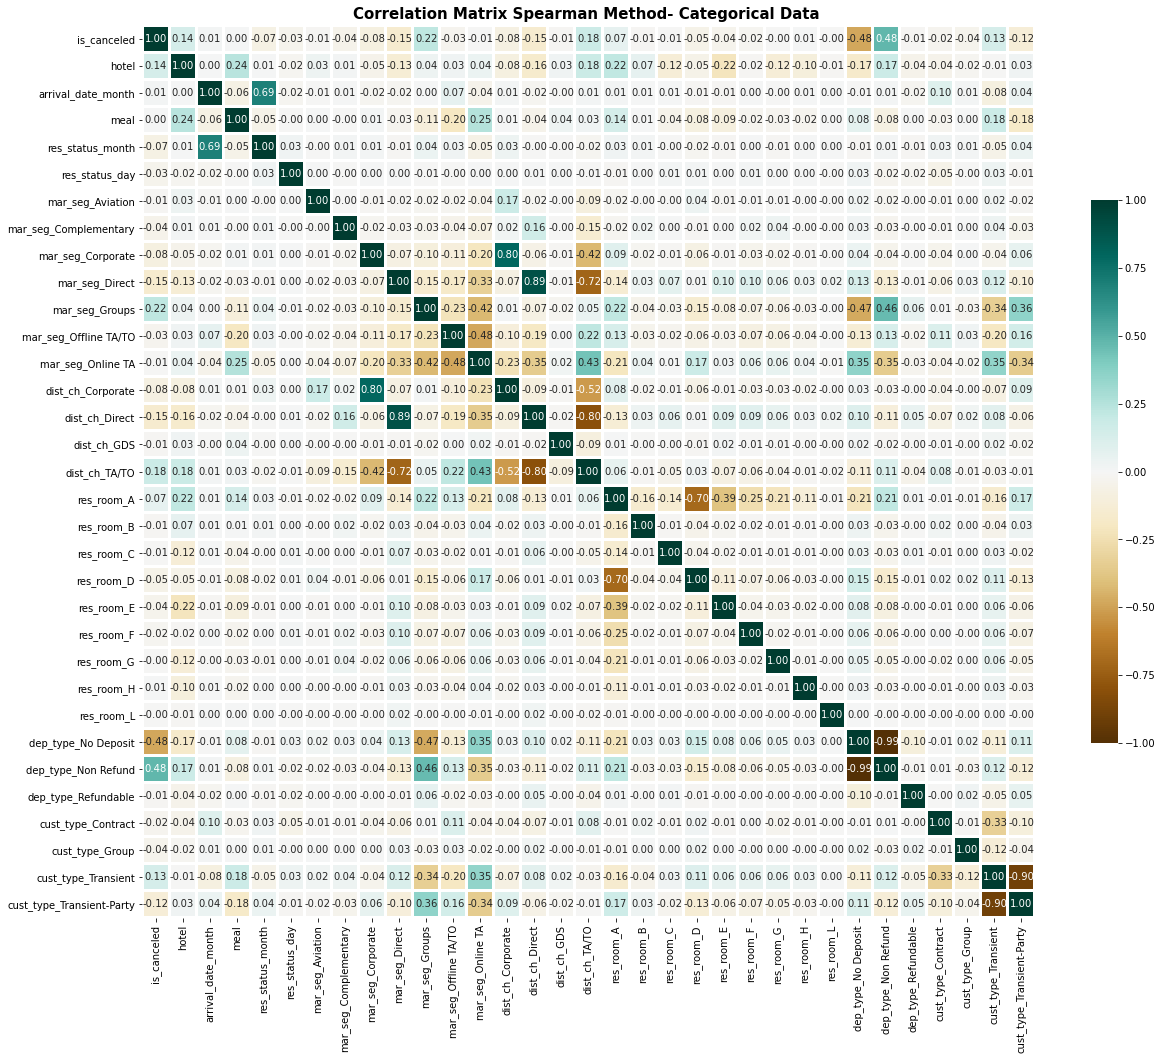

In [25]:
# Correlation Matrix with Spearman method

plt.figure(figsize=(20,20))
corr_categorical = cat_df_cancel.corr(method='spearman')
mask_categorical = np.triu(np.ones_like(corr_categorical, dtype=np.bool))
sns.heatmap(corr_categorical, annot=True, fmt=".2f", cmap='BrBG', vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(33, 0))
plt.title("Correlation Matrix Spearman Method- Categorical Data ",size=15, weight='bold')

In [26]:
num_cols = [col for col in data_cln.columns if data_cln[col].dtype != 'O']
num_df = data_cln[num_cols]
num_df.head()

is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0            0        342               2015                        27   
1            0        737               2015                        27   
2            0          7               2015                        27   
3            0         13               2015                        27   
4            0         14               2015                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies  is_repeated_guest  previous_cancellations  \
0       2       0.0       0                  0                       0   
1       2       0.0       0                  0                       0   
2       1       0.0       0                  0                       0   
3       1       0.0       0                  0                       0   
4       2       0.0       0                  0                       0   

   previous_bookings_not_canceled  booking_changes  agent  company  \
0                               0                3    0.0      0.0   
1                               0                4    0.0      0.0   
2                               0                0    0.0      0.0   
3                               0                0  304.0      0.0   
4                               0                0  240.0      0.0   

   days_in_waiting_list   adr  required_car_parking_spaces  \
0                     0   0.0                            0   
1                     0   0.0                            0   
2                     0  75.0                            0   
3                     0  75.0                            0   
4                     0  98.0                            0   

   total_of_special_requests  
0                          0  
1                          0  
2                          0  
3                          0  
4                          1

In [27]:
# change agent and company ID columns so that they only have values 1 or 0 based on whether a agent/company was associated with the booking 
num_df.loc[num_df['agent'] > 0, 'agent'] = 1
num_df.loc[num_df['company'] > 0, 'company'] = 1

# drop some columns to make the model more general and to prevent leakage
num_df.drop(['arrival_date_year', 'booking_changes'] , axis = 1, inplace = True)
num_df.head()

C:\Users\eetus\miniconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\eetus\miniconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\eetus\miniconda3\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in th

is_canceled  lead_time  arrival_date_week_number  \
0            0        342                        27   
1            0        737                        27   
2            0          7                        27   
3            0         13                        27   
4            0         14                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies  is_repeated_guest  previous_cancellations  \
0       2       0.0       0                  0                       0   
1       2       0.0       0                  0                       0   
2       1       0.0       0                  0                       0   
3       1       0.0       0                  0                       0   
4       2       0.0       0                  0                       0   

   previous_bookings_not_canceled  agent  company  days_in_waiting_list   adr  \
0                               0    0.0      0.0                     0   0.0   
1                               0    0.0      0.0                     0   0.0   
2                               0    0.0      0.0                     0  75.0   
3                               0    1.0      0.0                     0  75.0   
4                               0    1.0      0.0                     0  98.0   

   required_car_parking_spaces  total_of_special_requests  
0                            0                          0  
1                            0                          0  
2                            0                          0  
3                            0                          0  
4                            0                          1

In [28]:
num_df.shape

(119205, 18)

Text(0.5, 1.0, 'Correlation Matrix Spearman Method- Numerical Data ')

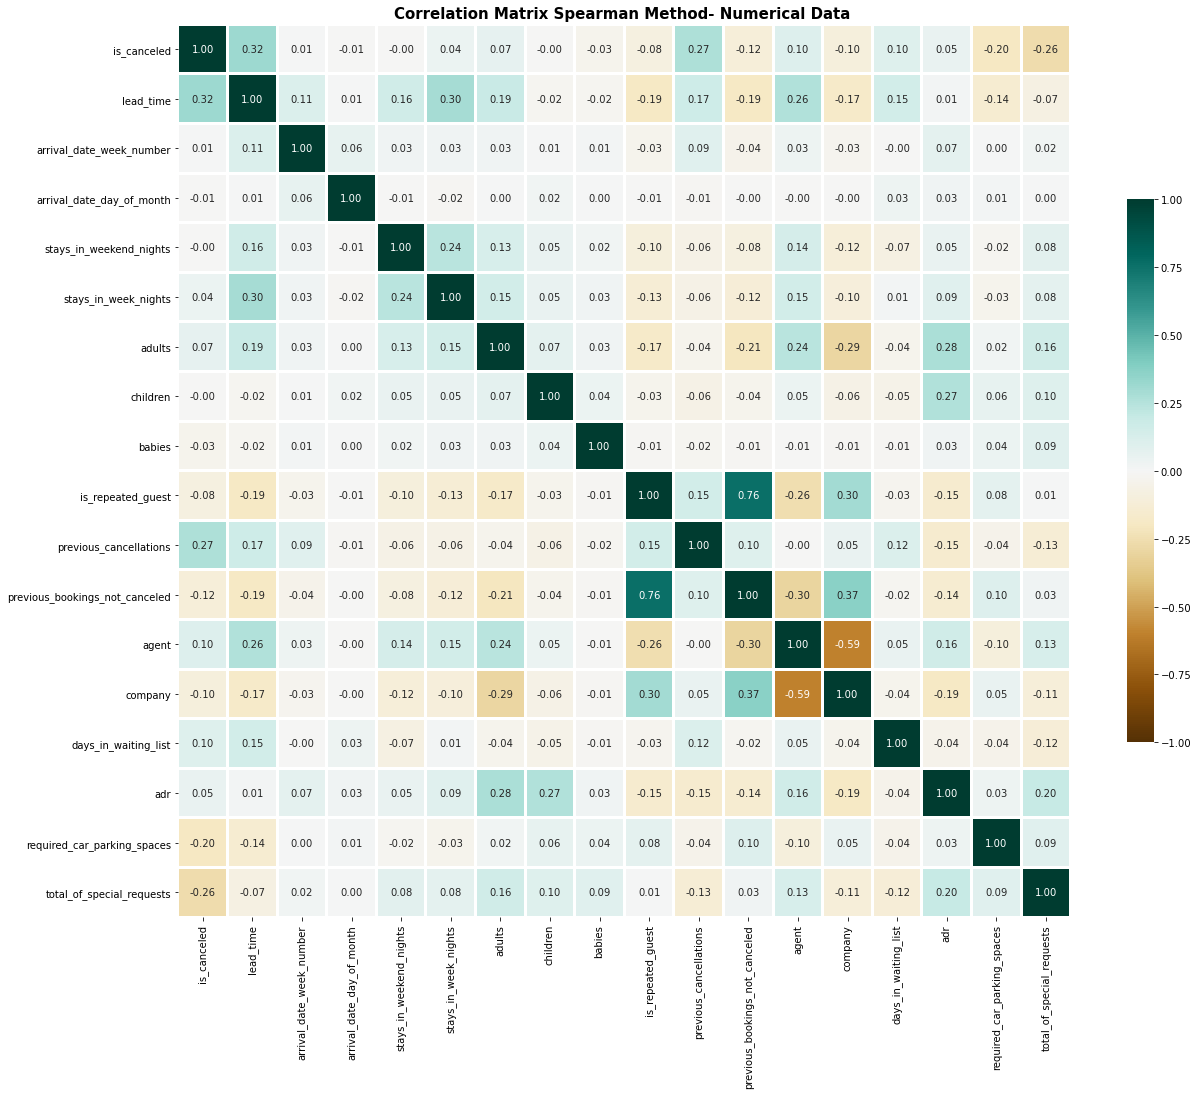

In [29]:
# Correlation Matrix with Spearman method

plt.figure(figsize=(20,20))
corr_num = num_df.corr(method='spearman')
mask_num = np.triu(np.ones_like(corr_num, dtype=np.bool))
sns.heatmap(corr_num, annot=True, fmt=".2f", cmap='BrBG', vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(18, 0))
plt.title("Correlation Matrix Spearman Method- Numerical Data ",size=15, weight='bold')

In [30]:
# Some of the columns in num_df and cat_df that are not so relevant could perhaps be excluded from the final dataframe. 
# It would make the model simpler and have minimal effect on model performance

In [31]:
num_df.head()

is_canceled  lead_time  arrival_date_week_number  \
0            0        342                        27   
1            0        737                        27   
2            0          7                        27   
3            0         13                        27   
4            0         14                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies  is_repeated_guest  previous_cancellations  \
0       2       0.0       0                  0                       0   
1       2       0.0       0                  0                       0   
2       1       0.0       0                  0                       0   
3       1       0.0       0                  0                       0   
4       2       0.0       0                  0                       0   

   previous_bookings_not_canceled  agent  company  days_in_waiting_list   adr  \
0                               0    0.0      0.0                     0   0.0   
1                               0    0.0      0.0                     0   0.0   
2                               0    0.0      0.0                     0  75.0   
3                               0    1.0      0.0                     0  75.0   
4                               0    1.0      0.0                     0  98.0   

   required_car_parking_spaces  total_of_special_requests  
0                            0                          0  
1                            0                          0  
2                            0                          0  
3                            0                          0  
4                            0                          1

In [32]:
cat_df.head()

is_canceled  hotel  arrival_date_month  meal  res_status_month  \
0            0      0                   7     2                 7   
1            0      0                   7     2                 7   
2            0      0                   7     2                 7   
3            0      0                   7     2                 7   
4            0      0                   7     2                 7   

   res_status_day  mar_seg_Aviation  mar_seg_Complementary  mar_seg_Corporate  \
0               1                 0                      0                  0   
1               1                 0                      0                  0   
2               2                 0                      0                  0   
3               2                 0                      0                  1   
4               3                 0                      0                  0   

   mar_seg_Direct  mar_seg_Groups  mar_seg_Offline TA/TO  mar_seg_Online TA  \
0               1               0                      0                  0   
1               1               0                      0                  0   
2               1               0                      0                  0   
3               0               0                      0                  0   
4               0               0                      0                  1   

   dist_ch_Corporate  dist_ch_Direct  dist_ch_GDS  dist_ch_TA/TO  res_room_A  \
0                  0               1            0              0           0   
1                  0               1            0              0           0   
2                  0               1            0              0           1   
3                  1               0            0              0           1   
4                  0               0            0              1           1   

   res_room_B  res_room_C  res_room_D  res_room_E  res_room_F  res_room_G  \
0           0           1           0           0           0           0   
1           0           1           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   res_room_H  res_room_L  dep_type_No Deposit  dep_type_Non Refund  \
0           0           0                    1                    0   
1           0           0                    1                    0   
2           0           0                    1                    0   
3           0           0                    1                    0   
4           0           0                    1                    0   

   dep_type_Refundable  cust_type_Contract  cust_type_Group  \
0                    0                   0                0   
1                    0                   0                0   
2                    0                   0                0   
3                    0                   0                0   
4                    0                   0                0   

   cust_type_Transient  cust_type_Transient-Party  
0                    1                          0  
1                    1                          0  
2                    1                          0  
3                    1                          0  
4                    1                          0

In [33]:
print('num_df shape:',num_df.shape)
print('cat_df shape:',cat_df.shape)

num_df shape: (119205, 18)
cat_df shape: (119205, 33)


# Final dataframes

### Dataframe for EDA

In [34]:
data_cln.head(10)

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   
5  Resort Hotel            0         14               2015               July   
6  Resort Hotel            0          0               2015               July   
7  Resort Hotel            0          9               2015               July   
8  Resort Hotel            1         85               2015               July   
9  Resort Hotel            1         75               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   
5                        27                          1   
6                        27                          1   
7                        27                          1   
8                        27                          1   
9                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   
5                        0                     2       2       0.0       0   
6                        0                     2       2       0.0       0   
7                        0                     2       2       0.0       0   
8                        0                     3       2       0.0       0   
9                        0                     3       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   
5   BB     GBR      Online TA                TA/TO                  0   
6   BB     PRT         Direct               Direct                  0   
7   FB     PRT         Direct               Direct                  0   
8   BB     PRT      Online TA                TA/TO                  0   
9   HB     PRT  Offline TA/TO                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   
5                       0                               0                  A   
6                       0                               0                  C   
7                       0                               0                  C   
8                       0                               0                  A   
9               

In [35]:
print('data_cln shape:',data_cln.shape)

data_cln shape: (119205, 32)


In [36]:
# Export DataFrame to CSV
data_cln.to_csv("hotel_bookings_clean.csv")

### Dataframe for ML methods

In [37]:
df_merg = pd.concat([num_df,cat_df.drop(['is_canceled'],axis=1)],axis=1)
df_merg.head(50)

is_canceled  lead_time  arrival_date_week_number  \
0             0        342                        27   
1             0        737                        27   
2             0          7                        27   
3             0         13                        27   
4             0         14                        27   
5             0         14                        27   
6             0          0                        27   
7             0          9                        27   
8             1         85                        27   
9             1         75                        27   
10            1         23                        27   
11            0         35                        27   
12            0         68                        27   
13            0         18                        27   
14            0         37                        27   
15            0         68                        27   
16            0         37                        27   
17            0         12                        27   
18            0          0                        27   
19            0          7                        27   
20            0         37                        27   
21            0         72                        27   
22            0         72                        27   
23            0         72                        27   
24            0        127                        27   
25            0         78                        27   
26            0         48                        27   
27            1         60                        27   
28            0         77                        27   
29            0         99                        27   
30            0        118                        27   
31            0         95                        27   
32            1         96                        27   
33            0         69                        27   
34            1         45                        27   
35            1         40                        27   
36            0         15                        27   
37            0         36                        27   
38            1         43                        27   
39            0         70                        27   
40            1         45                        27   
41            0         45                        27   
42            0         16                        27   
43            0         70                        27   
44            0        107                        27   
45            1         47                        27   
46            0         96                        27   
47            0        113                        27   
48            0         90                        27   
49            0         50                        27   

    arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                           1                        0                     0   
1                           1                        0                     0   
2                           1                        0                     1   
3                           1                        0                     1   
4                           1                        0                     2   
5                           1                        0                     2   
6                           1                        0                     2   
7                           1                        0                     2   
8                           1                        0                     3   
9                           1                        0                     3   
10                          1                        0                     4   
11                          1                        0                     4   
12                          1                        0                     4   
13                         

In [38]:
# MinMax scaling
df = df_merg
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df) 
df.loc[:,:] = scaled_values

df.head(50)

is_canceled  lead_time  arrival_date_week_number  \
0           0.0   0.464043                       0.5   
1           0.0   1.000000                       0.5   
2           0.0   0.009498                       0.5   
3           0.0   0.017639                       0.5   
4           0.0   0.018996                       0.5   
5           0.0   0.018996                       0.5   
6           0.0   0.000000                       0.5   
7           0.0   0.012212                       0.5   
8           1.0   0.115332                       0.5   
9           1.0   0.101764                       0.5   
10          1.0   0.031208                       0.5   
11          0.0   0.047490                       0.5   
12          0.0   0.092266                       0.5   
13          0.0   0.024423                       0.5   
14          0.0   0.050204                       0.5   
15          0.0   0.092266                       0.5   
16          0.0   0.050204                       0.5   
17          0.0   0.016282                       0.5   
18          0.0   0.000000                       0.5   
19          0.0   0.009498                       0.5   
20          0.0   0.050204                       0.5   
21          0.0   0.097693                       0.5   
22          0.0   0.097693                       0.5   
23          0.0   0.097693                       0.5   
24          0.0   0.172320                       0.5   
25          0.0   0.105834                       0.5   
26          0.0   0.065129                       0.5   
27          1.0   0.081411                       0.5   
28          0.0   0.104478                       0.5   
29          0.0   0.134328                       0.5   
30          0.0   0.160109                       0.5   
31          0.0   0.128901                       0.5   
32          1.0   0.130258                       0.5   
33          0.0   0.093623                       0.5   
34          1.0   0.061058                       0.5   
35          1.0   0.054274                       0.5   
36          0.0   0.020353                       0.5   
37          0.0   0.048847                       0.5   
38          1.0   0.058345                       0.5   
39          0.0   0.094980                       0.5   
40          1.0   0.061058                       0.5   
41          0.0   0.061058                       0.5   
42          0.0   0.021710                       0.5   
43          0.0   0.094980                       0.5   
44          0.0   0.145183                       0.5   
45          1.0   0.063772                       0.5   
46          0.0   0.130258                       0.5   
47          0.0   0.153324                       0.5   
48          0.0   0.122117                       0.5   
49          0.0   0.067843                       0.5   

    arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                    0.000000                 0.000000                  0.00   
1                    0.000000                 0.000000                  0.00   
2                    0.000000                 0.000000                  0.02   
3                    0.000000                 0.000000                  0.02   
4                    0.000000                 0.000000                  0.04   
5                    0.000000                 0.000000                  0.04   
6                    0.000000                 0.000000                  0.04   
7                    0.000000                 0.000000                  0.04   
8                    0.000000                 0.000000                  0.06   
9                    0.000000                 0.000000                  0.06   
10                   0.000000                 0.000000                  0.08   
11                   0.000000                 0.000000                  0.08   
12                   0.000000                 0.000000                  0.08   
13                   0.0000

In [39]:
print('df shape:',df.shape)

df shape: (119205, 50)


In [40]:
# Export DataFrame to CSV
df.to_csv("hotel_bookings_ML_data.csv")

In [41]:
# correlations
corr = df.corr()["is_canceled"]
corr.sort_values(ascending=False)[1:]

dep_type_Non Refund               0.481537
lead_time                         0.292930
mar_seg_Groups                    0.222014
dist_ch_TA/TO                     0.176107
hotel                             0.137049
cust_type_Transient               0.133325
previous_cancellations            0.110147
agent                             0.102259
res_room_A                        0.069197
adults                            0.058157
days_in_waiting_list              0.054308
adr                               0.046559
stays_in_week_nights              0.025551
arrival_date_month                0.011160
arrival_date_week_number          0.008299
res_room_H                        0.005439
children                          0.004877
res_room_L                       -0.000550
stays_in_weekend_nights          -0.001309
res_room_G                       -0.001667
meal                             -0.003502
arrival_date_day_of_month        -0.005910
mar_seg_Online TA                -0.006219
res_room_C 